### Python

In [1]:
# Load libraries
import pandas as pd
import matplotlib.pyplot as plt
import squarify
import seaborn as sb

In [2]:
# Read data file
unemployment_df = pd.read_csv("data/unemployement-rate-1948-2010.csv")
unemployment_df.head()

,Series id,Year,Period,Value
0,LNS14000000,1948,M01,3.4
1,LNS14000000,1948,M02,3.8
2,LNS14000000,1948,M03,4.0
3,LNS14000000,1948,M04,3.9
4,LNS14000000,1948,M05,3.5


In [3]:
unemployment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 746 entries, 0 to 745
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Series id  746 non-null    object 
 1   Year       746 non-null    int64  
 2   Period     746 non-null    object 
 3   Value      746 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 23.4+ KB


In [4]:
unemployment_df['Year'].value_counts().sort_index(ascending = False)

2010     2
2009    12
2008    12
2007    12
2006    12
        ..
1952    12
1951    12
1950    12
1949    12
1948    12
Name: Year, Length: 63, dtype: int64

In [5]:
# Read data file
expenditures_df = pd.read_csv("data/expenditures.txt", sep = '\t', lineterminator = '\r')
expenditures_df.head()

,year,category,expenditure,sex
0,2008,Food,6443,1
1,2008,Alcoholic Beverages,444,1
2,2008,Housing,17109,1
3,2008,Apparel,1801,1
4,2008,Transportation,8604,1


### Charts

#### Treemap

In [6]:
# get top 7 categories by expenditures
category_year = expenditures_df.groupby('category')['expenditure'].sum().nlargest(7)
category_year

category
Housing               280256
Transportation        160694
Food                  119297
Personal Insurance     84269
Healthcare             47383
Entertainment          44273
Apparel                41833
Name: expenditure, dtype: int64

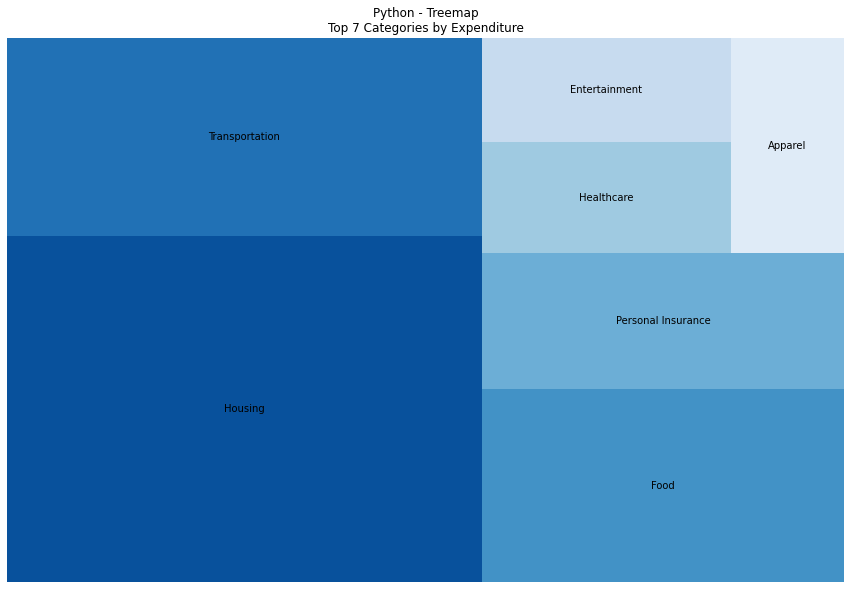

In [7]:
fig, ax = plt.subplots(figsize = (15, 10))
squarify.plot(sizes = category_year.values, label = category_year.index, 
              color = sb.color_palette("Blues_r", len(category_year.values)))
plt.title('Python - Treemap\nTop 7 Categories by Expenditure')
ax.axis('off')

plt.show()

# Save figure
ax.get_figure().savefig('images/treemap-python.png',
           bbox_inches = 'tight',
           transparent = True)

#### Area Chart

In [8]:
# expenditures per year for sex = 1
expenditures_per_year = expenditures_df.groupby('year')
expenditures_sex1 = expenditures_per_year.apply(lambda x: x[x['sex'] == 1]['expenditure'].sum())
expenditures_sex1

year
1984    21972
1985    23489
1986    23865
1987    24415
1988    25893
1989    27811
1990    28379
1991    29614
1992    30296
1993    30692
1994    31733
1995    32262
1996    33798
1997    34820
1998    35536
1999    36996
2000    38045
2001    39519
2002    40676
2003    40818
2004    43392
2005    46407
2006    48400
2007    49619
2008    50489
dtype: int64

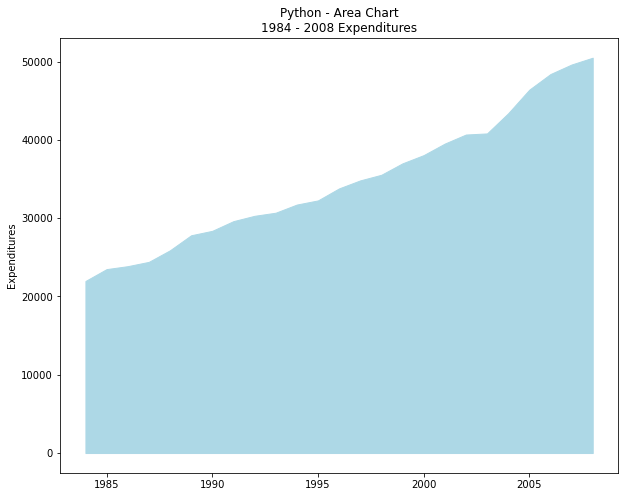

In [9]:
fig, ax = plt.subplots(figsize=(10,8))

ax.fill_between(expenditures_sex1.keys(), expenditures_sex1.values, color='lightblue')

plt.title('Python - Area Chart\n1984 - 2008 Expenditures')
plt.ylabel('Expenditures')
plt.xlabel('')

plt.show()

# Save figure
ax.get_figure().savefig('images/area-chart-python.png',
           bbox_inches = 'tight',
           transparent = True)

#### Stacked Area Chart

In [14]:
year_2007 = list(unemployment_df[unemployment_df['Year'] == 2007]['Value'])
year_2008 = list(unemployment_df[unemployment_df['Year'] == 2008]['Value'])
year_2009 = list(unemployment_df[unemployment_df['Year'] == 2009]['Value'])

y_values = {
    '2009': year_2009,
    '2008': year_2008,
    '2007': year_2007
}

y_values

{'2009': [7.7, 8.2, 8.6, 8.9, 9.4, 9.5, 9.4, 9.7, 9.8, 10.1, 10.0, 10.0],
 '2008': [5.0, 4.8, 5.1, 5.0, 5.4, 5.5, 5.8, 6.1, 6.2, 6.6, 6.9, 7.4],
 '2007': [4.6, 4.5, 4.4, 4.5, 4.4, 4.6, 4.6, 4.6, 4.7, 4.7, 4.7, 5.0]}

In [15]:
x = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

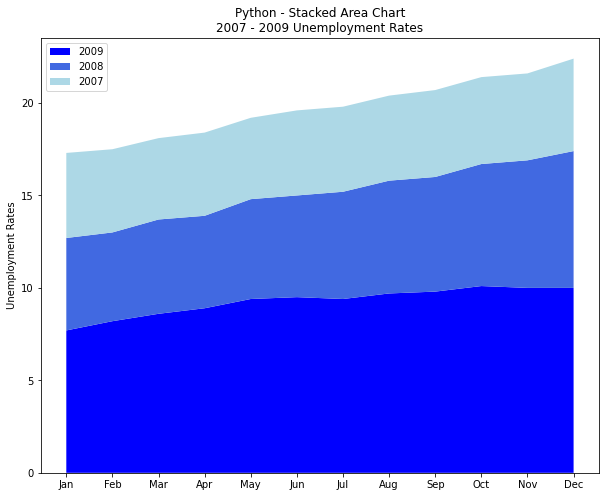

In [16]:
fig, ax = plt.subplots(figsize=(10,8))

ax.stackplot(x, y_values.values(), labels = y_values.keys(), colors = ['blue', 'royalblue', 'lightblue'])
plt.title('Python - Stacked Area Chart\n2007 - 2009 Unemployment Rates')
plt.ylabel('Unemployment Rates')
plt.xlabel('')

# legend
ax.legend(loc = 'upper left')

plt.show()

# Save figure
ax.get_figure().savefig('images/stacked-area-chart-python.png',
           bbox_inches = 'tight',
           transparent = True)